In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

In [3]:
df_c = pd.read_csv('Customers.csv')
df_p = pd.read_csv('Products.csv')
df_t = pd.read_csv('Transactions.csv')

In [4]:
df_c.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
df_p.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
df_t.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [7]:
print(df_p.isna().sum())
print("======================")
print(df_c.isna().sum())
print("======================")
print(df_t.isna().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
print("======================STATS OF CUSTOMERS DATA======================")
print(df_c.describe())
print("======================STATS OF PAYMENTS DATA======================")
print(df_p.describe())
print("======================STATS OF TRANSACTIONS DATA======================")
print(df_t.describe())

======================STATS OF CUSTOMERS DATA======================
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
======================STATS OF PAYMENTS DATA======================
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
======================STATS OF TRANSACTIONS DATA======================
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%      

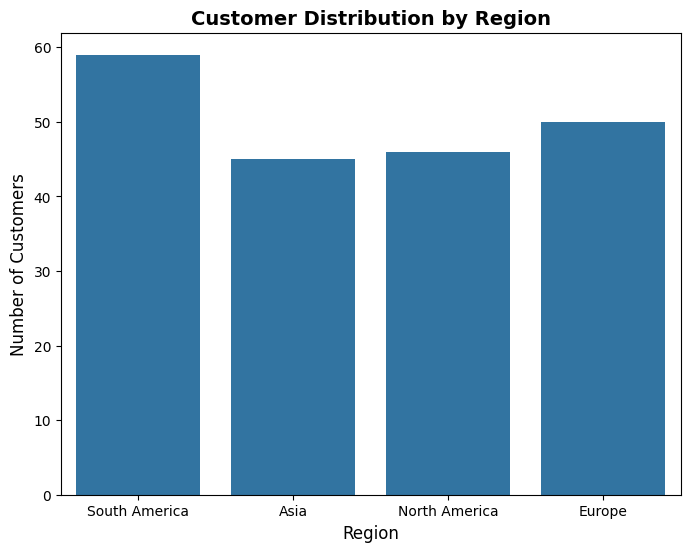

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_c, x='Region')
plt.title('Customer Distribution by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- **South America has the highest customer base, with the bar reaching close to 60.**
- **Europe has the second-largest customer base, with a count slightly above 50.**
- **Asia and North America have similar customer bases, both around 45.**

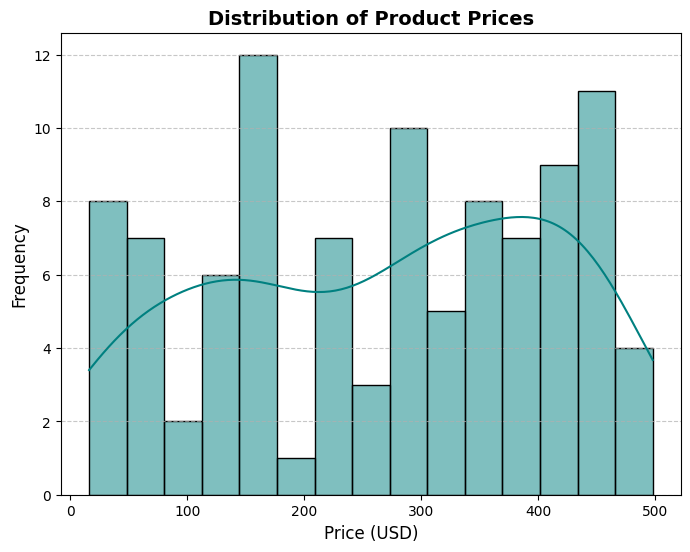

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df_p['Price'], bins=15, kde=True, color='teal')
plt.title('Distribution of Product Prices', fontsize=14, fontweight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **The first peak is around the 150-200 USD range. This indicates a significant number of products fall within this price bracket.**
- **The second peak is around the 400-450 USD range. This suggests another cluster of products with a higher price point.**
- **The distribution appears slightly skewed to the right, indicating a longer tail towards higher prices.**

In [11]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [12]:
# here we will convert transactiondate column to datetime for better analysis
df_t['TransactionDate'] = pd.to_datetime(df_t['TransactionDate'])

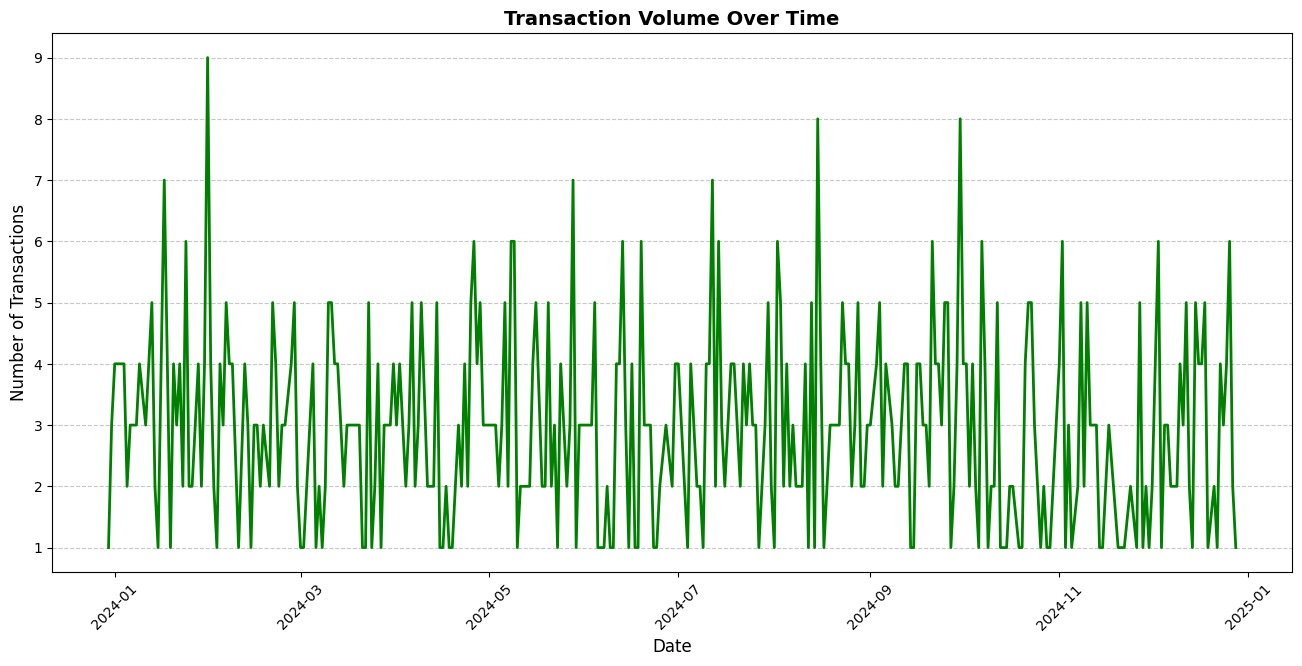

In [13]:
# Grouping transactions by date
transactions_per_day = df_t.groupby(df_t['TransactionDate'].dt.date).size()

plt.figure(figsize=(16, 7))
transactions_per_day.plot(kind='line', color='green', linewidth=2)
plt.title('Transaction Volume Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [14]:
# Merging Transactions with Products to include category information
merged_df = df_t.merge(df_p, on='ProductID')

In [15]:
# total revenue by category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

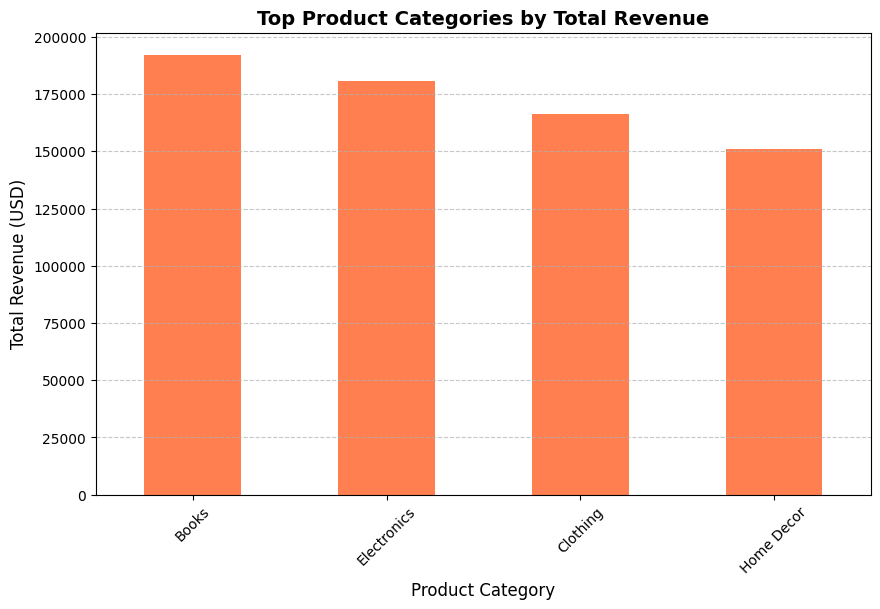

In [16]:
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='coral')
plt.title('Top Product Categories by Total Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **The bar for Books is the tallest, indicating that this category generates the highest total revenue.**

- **The Electronics category comes in second place, with a revenue bar slightly shorter than "Books.**

- **Clothing and Home Decor have similar revenue levels, both significantly lower than Books and Electronics.**

In [17]:
# total spending by each customer
customer_spending = df_t.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

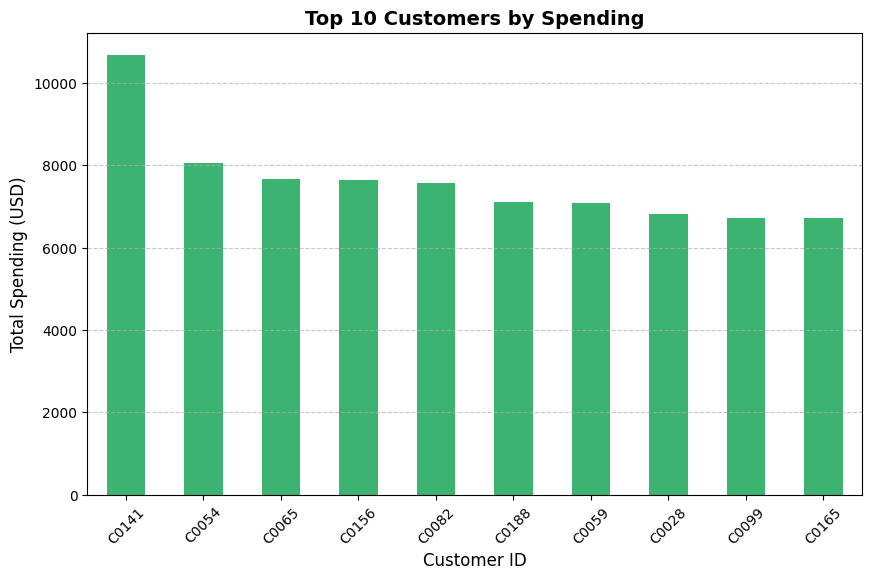

In [18]:
plt.figure(figsize=(10, 6))
customer_spending.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Customers by Spending', fontsize=14, fontweight='bold')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Merging Transactions with Customers to include region information
merged_region_df = df_t.merge(df_c, on='CustomerID')

In [20]:
# total revenue by region
region_revenue = merged_region_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

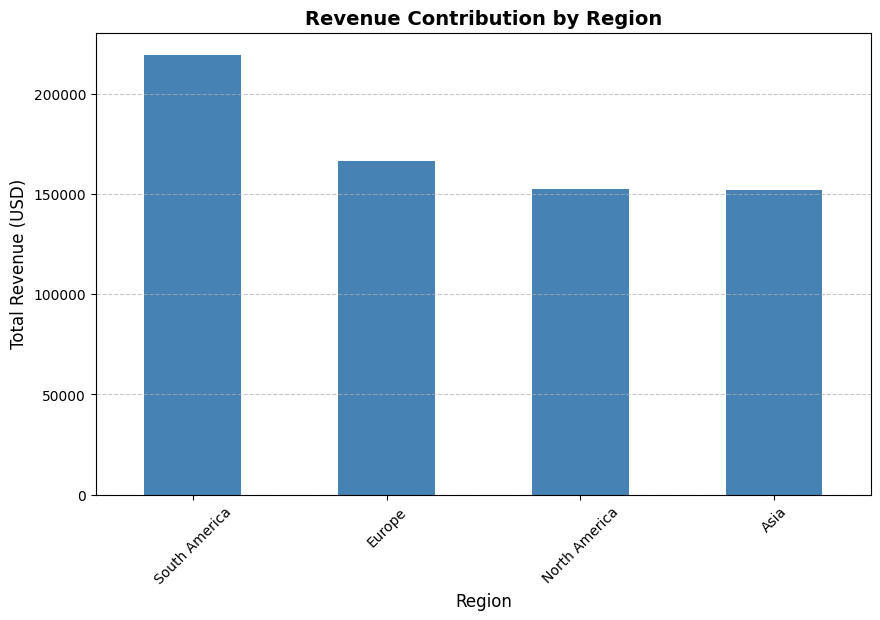

In [21]:
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='steelblue')
plt.title('Revenue Contribution by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **South America generates the highest total revenue, with the bar reaching close to the 200,000 USD mark.**

- **Europe comes in second place, with a revenue contribution significantly lower than South America.**

- **Both North America and Asia have similar revenue levels, both significantly lower than South America and Europe.**